**<h2 style="text-align: center; color:#FF0000;">BI - CLUSTERING </h2>**

#### **Neccessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore
from sklearn.manifold import TSNE,Isomap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,SpectralBiclustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
import warnings

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings("ignore")

## **Login**

### **Read & explore data**

In [2]:
df_login=pd.read_csv("../EDA_transform/data/login_transform.csv")
df_login

,vopenid,last_update_time,num_day_login,avg_login_per_day,avg_between_login,streak_login,last_since_from_login,popular_time_login,gold_std_login,diamond_std_login,silkcoin_std_login,gold_slope_login,diamond_slope_login,silkcoin_slope_login,powerpoint_last_login,level_last_login,vip_last_login
0,2206111754266455,2025-05-08 11:08:20+00:00,2,1.00,1.02,2,39,10,12632.46,0.00,0.00,17865.00,0.00,0.00,29366,9,0
1,2206111758351763,2025-05-26 05:07:07+00:00,1,1.00,0.00,1,21,5,0.00,0.00,0.00,0.00,0.00,0.00,25359,1,0
2,2206111808105074,2025-06-16 02:01:16+00:00,2,3.00,0.09,2,0,1,191511.83,0.41,0.00,61253.34,-0.14,0.00,74275,21,0
3,2206111830413361,2025-06-18 00:44:14+00:00,46,3.54,0.28,35,-2,22,7316897.55,0.00,22.10,-96636.83,0.00,-0.17,212547,27,0
4,2206111904162575,2025-05-20 01:58:44+00:00,1,1.00,0.00,1,27,1,0.00,0.00,0.00,0.00,0.00,0.00,24938,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199365,lkeu,2025-06-18 06:40:34+00:00,2,1.00,5.95,1,-2,6,3558.87,0.00,0.00,5033.00,0.00,0.00,24218,3,0
199366,lknew,2025-06-12 04:50:52+00:00,2,2.00,4.97,1,4,3,4839.08,0.00,0.00,2800.00,0.00,0.00,479146,36,0
199367,tri3,2025-06-16 08:20:13+00:00,1,2.00,0.10,1,0,5,0.00,0.00,0.00,0.00,0.00,0.00,26467,1,0
199368,vtvinh,2025-06-17 07:10:48+00:00,3,3.00,0.75,2,-1,6,186669.67,0.00,0.00,52153.97,0.00,0.00,106968,23,0


In [3]:
df_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199370 entries, 0 to 199369
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vopenid                199370 non-null  object 
 1   last_update_time       199370 non-null  object 
 2   num_day_login          199370 non-null  int64  
 3   avg_login_per_day      199370 non-null  float64
 4   avg_between_login      199370 non-null  float64
 5   streak_login           199370 non-null  int64  
 6   last_since_from_login  199370 non-null  int64  
 7   popular_time_login     199370 non-null  int64  
 8   gold_std_login         199370 non-null  float64
 9   diamond_std_login      199370 non-null  float64
 10  silkcoin_std_login     199370 non-null  float64
 11  gold_slope_login       199370 non-null  float64
 12  diamond_slope_login    199370 non-null  float64
 13  silkcoin_slope_login   199370 non-null  float64
 14  powerpoint_last_login  199370 non-nu

In [4]:
df_login.describe()

,num_day_login,avg_login_per_day,avg_between_login,streak_login,last_since_from_login,popular_time_login,gold_std_login,diamond_std_login,silkcoin_std_login,gold_slope_login,diamond_slope_login,silkcoin_slope_login,powerpoint_last_login,level_last_login,vip_last_login
count,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00
mean,16.73,4.45,0.63,10.89,6.90,10.43,6662256.16,27.35,107.04,85816.04,0.49,0.06,2628408.61,32.25,0.27
std,16.04,6.00,1.66,12.95,12.50,5.93,30679769.44,77.37,770.24,1558377.92,8.48,45.69,6847504.40,23.82,0.85
min,1.00,1.00,0.00,1.00,-3.00,0.00,0.00,0.00,0.00,-270112036.00,-330.00,-5712.32,22114.00,1.00,0.00
25%,2.00,1.60,0.11,2.00,-2.00,5.00,20868.36,0.00,0.00,0.00,0.00,0.00,29571.00,15.00,0.00
50%,9.00,3.00,0.24,5.00,1.00,11.00,194619.74,0.00,0.00,3825.11,0.00,0.00,135479.00,26.00,0.00
75%,32.00,5.55,0.55,15.00,12.00,14.00,1176873.73,0.00,66.38,38656.43,0.00,0.00,1973028.75,53.00,0.00
max,47.00,608.00,45.14,47.00,43.00,23.00,1654511138.83,4480.45,159789.57,216312396.00,1501.00,7500.00,61320977.00,90.00,3.00


In [5]:
numeric_fields = [
    "vip_last_login",
    "powerpoint_last_login",
    "level_last_login"
]

for col in numeric_fields:
    df_login[col] = pd.to_numeric(df_login[col], errors='coerce').fillna(-1.0)

df_login = df_login[~(df_login[numeric_fields] == -1.0).any(axis=1)]
df_login.reset_index(drop=True,inplace=True)

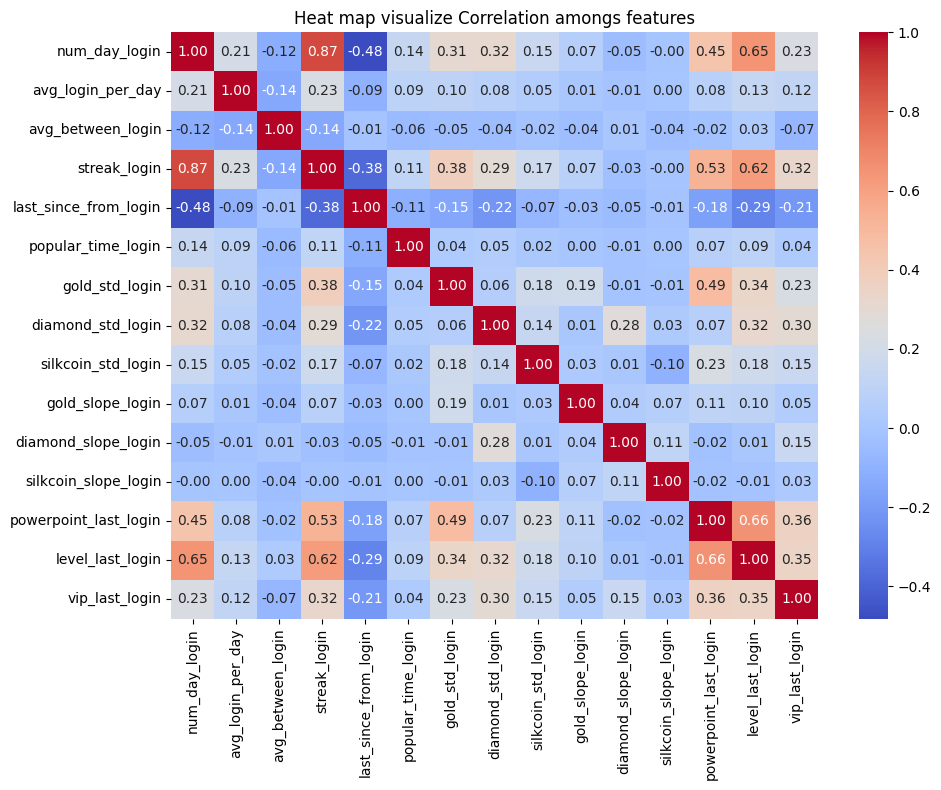

In [6]:
corr_cols = df_login.drop(columns=['vopenid','last_update_time']).columns

plt.figure(figsize=(10,8))
sns.heatmap(df_login[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat map visualize Correlation amongs features')
plt.tight_layout()
plt.show()

### **Prepare data and modeling**

In [12]:
features = df_login.select_dtypes(include=['float64', 'int64']) \
    .drop(columns=['powerpoint_last_login', 'level_last_login'])
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [13]:
model = SpectralBiclustering(n_clusters=4, random_state=0)
model.fit(X)
df_login['bicluster'] = model.row_labels_

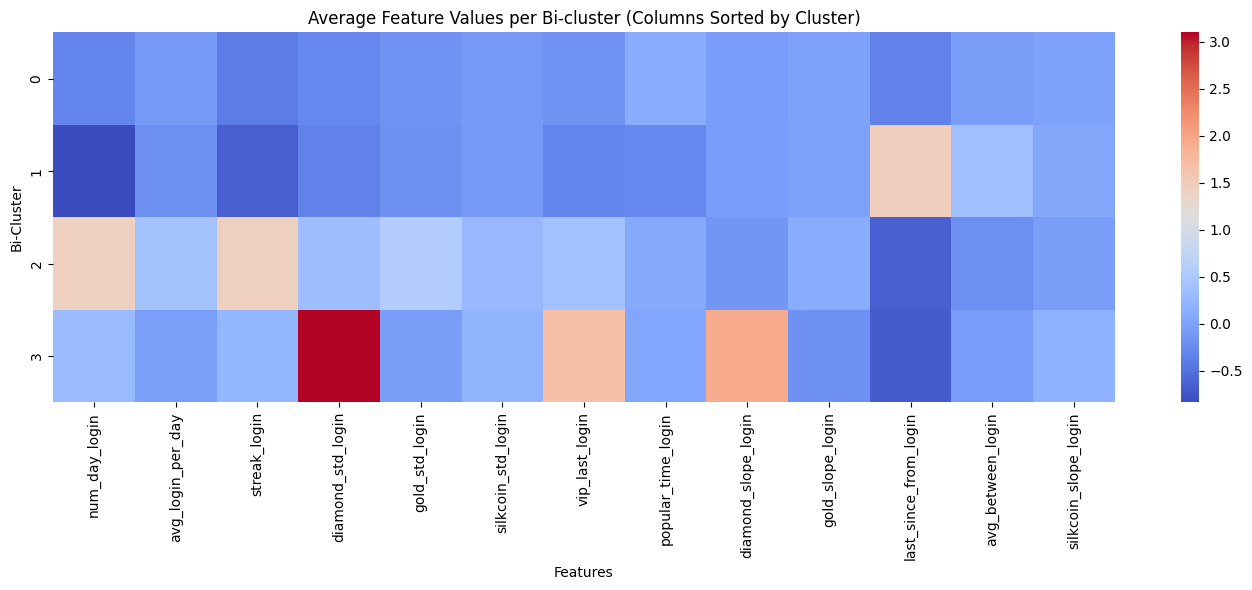

In [14]:
df_scaled = pd.DataFrame(X, columns=features.columns, index=df_login.index)
df_scaled['bicluster'] = df_login['bicluster']
cluster_summary = df_scaled.groupby('bicluster').mean()

col_clusters = model.column_labels_
feature_clusters = pd.DataFrame({
    'Feature': features.columns,
    'Cluster': col_clusters
})
sorted_columns = feature_clusters.sort_values('Cluster')['Feature'].values

plt.figure(figsize=(14, 6))
sns.heatmap(cluster_summary[sorted_columns], annot=False, cmap="coolwarm")
plt.title('Average Feature Values per Bi-cluster (Columns Sorted by Cluster)')
plt.xlabel('Features')
plt.ylabel('Bi-Cluster')
plt.tight_layout()
plt.show()

In [15]:
feature_clusters=feature_clusters.sort_values(by=['Cluster'])
feature_clusters

,Feature,Cluster
0,num_day_login,0
1,avg_login_per_day,0
3,streak_login,0
7,diamond_std_login,0
6,gold_std_login,0
8,silkcoin_std_login,0
12,vip_last_login,0
5,popular_time_login,1
10,diamond_slope_login,1
9,gold_slope_login,1


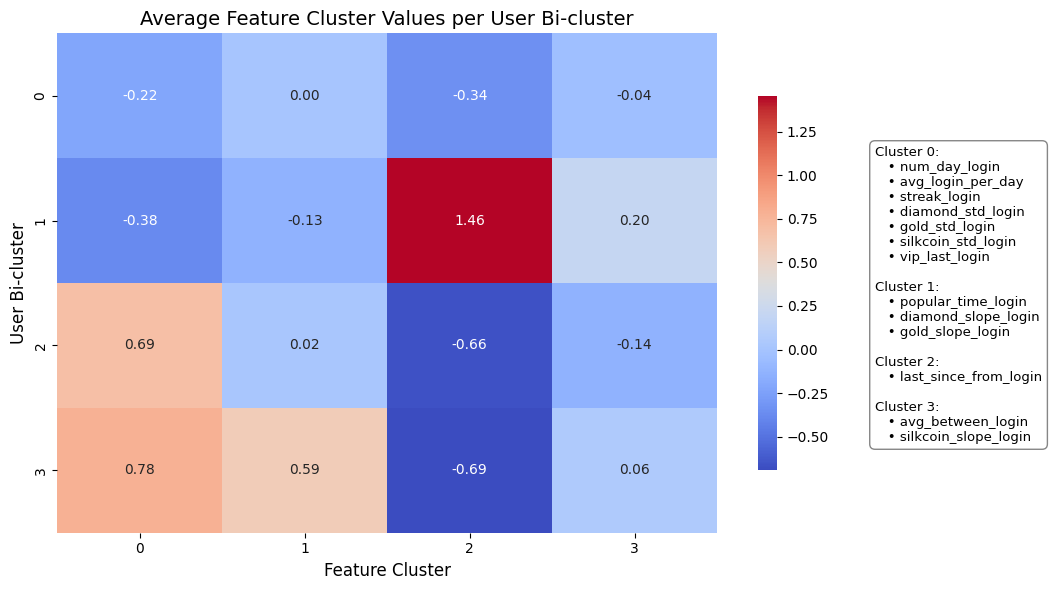

In [ ]:
# calculate 
melted = df_scaled.drop(columns='bicluster').copy()
melted['bicluster'] = model.row_labels_
melted = melted.melt(id_vars='bicluster', var_name='Feature', value_name='Value')

melted = melted.merge(feature_clusters, on='Feature')
grouped = melted.groupby(['bicluster', 'Cluster'])['Value'].mean().reset_index()
matrix = grouped.pivot(index='bicluster', columns='Cluster', values='Value')

legend_text = ""
for i in sorted(feature_clusters['Cluster'].unique()):
    feat_list = feature_clusters[feature_clusters['Cluster'] == i]['Feature'].tolist()
    feat_str = "\n   • " + "\n   • ".join(feat_list)
    legend_text += f"Cluster {i}:{feat_str}\n\n"

fig, ax = plt.subplots(figsize=(11, 6))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': 0.75}, ax=ax)

ax.set_title("Average Feature Cluster Values per User Bi-cluster", fontsize=14)
ax.set_xlabel("Feature Cluster", fontsize=12)
ax.set_ylabel("User Bi-cluster", fontsize=12)

props = dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='gray', alpha=0.95)
fig.text(0.8, 0.5, legend_text.strip(), fontsize=9.5, va='center', ha='left', bbox=props)

plt.tight_layout(rect=[0, 0, 0.82, 1]) 
plt.show()